# Задание: Линейная алгебра: сходство текстов и аппроксимация функций

## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Populating the interactive namespace from numpy and matplotlib


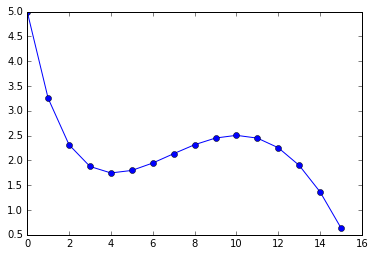

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1 Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [105]:
from scipy.linalg import solve
import numpy as np
x = np.arange(0, 16, 1)
ff = lambda x: sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

In [106]:
w = lambda a: solve([[x ** y for y in range(len(a))] for x in a], [ff(x) for x in a]) 
fm = lambda x, w: sum([w[n] * x**n for n in range(len(w))]) 

Populating the interactive namespace from numpy and matplotlib


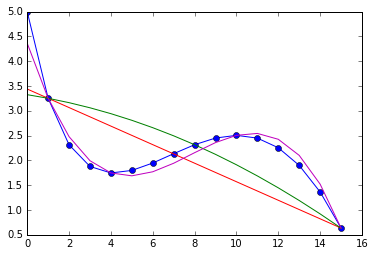

In [108]:
fmo = lambda x, w: [fm(x, w) for x in x]
w1 = w([1,15])
w2 = w([1,8,15])
w3 = w([1,4,10,15])
%pylab inline
plot(x, ff(x), '-o', x, fmo(x, w1), 'r', x, fmo(x, w2), 'g', x, fmo(x, w3), 'm')

In [ ]:
import sys
sys.path.append('../..')
from lib import *
pf('c1_w2_s2', pp(w3))